### **Insurance Provider and Billing Amount Analysis**

#### **Data Exploration and Cleaning**

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [3]:
#check the shape of the dataset
df.shape

(55500, 15)

In [4]:
#check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [5]:
#basic statistical summary for numerical columns
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [6]:
#checking for missing values
df.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [7]:
#check for duplicates
duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 534


In [8]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [9]:
#standardizing text columns
#Since columns like Name, Doctor, and Hospital might have inconsistent capitalization (like "Bobby JacksOn"), it can be helpful to standardize these columns to a consistent format.
df['Name'] = df['Name'].str.title()
df['Doctor'] = df['Doctor'].str.title()
df['Hospital'] = df['Hospital'].str.title()

In [10]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


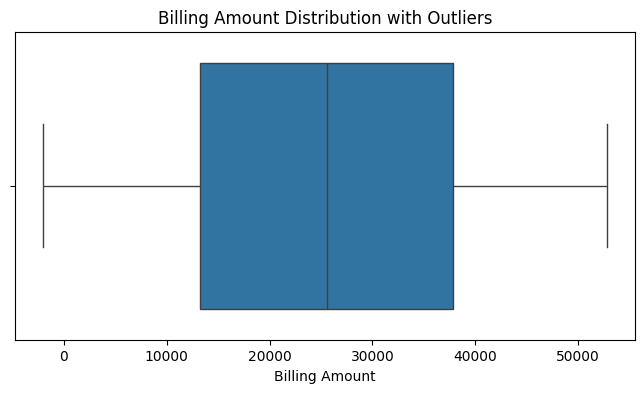

In [11]:
#outlier detection in billing amount
#boxplot for Billing Amount
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Billing Amount'])
plt.title("Billing Amount Distribution with Outliers")
plt.show()

In [12]:
#making sure that categorical variables are consistent
# Standardize categorical columns to title case
df['Gender'] = df['Gender'].str.title()
df['Blood Type'] = df['Blood Type'].str.upper()  # Keep blood types in uppercase (e.g., "A+")
df['Admission Type'] = df['Admission Type'].str.title()
df['Test Results'] = df['Test Results'].str.capitalize()


In [13]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                54966 non-null  object 
 1   Age                 54966 non-null  int64  
 2   Gender              54966 non-null  object 
 3   Blood Type          54966 non-null  object 
 4   Medical Condition   54966 non-null  object 
 5   Date of Admission   54966 non-null  object 
 6   Doctor              54966 non-null  object 
 7   Hospital            54966 non-null  object 
 8   Insurance Provider  54966 non-null  object 
 9   Billing Amount      54966 non-null  float64
 10  Room Number         54966 non-null  int64  
 11  Admission Type      54966 non-null  object 
 12  Discharge Date      54966 non-null  object 
 13  Medication          54966 non-null  object 
 14  Test Results        54966 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 8.7+ MB


In [15]:
# Date consistency and sanity check - Check if any discharge dates are before admission dates
invalid_dates = df[df['Discharge Date'] < df['Date of Admission']]
print("Number of invalid discharge dates:", invalid_dates.shape[0])

Number of invalid discharge dates: 0


In [16]:
#Calculate length of stay in days and add a new column
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# Calculate the length of stay in days
df['Length of Stay (days)'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
print(df.head())

            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby Jackson   30    Male         B-            Cancer        2024-01-31   
1   Leslie Terry   62    Male         A+           Obesity        2019-08-20   
2    Danny Smith   76  Female         A-           Obesity        2022-09-22   
3   Andrew Watts   28  Female         O+          Diabetes        2020-11-18   
4  Adrienne Bell   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons And Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook Plc              Aetna   
3       Kevin Wells  Hernandez Rogers And Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

#### **Exploratory Data Analysis (EDA)**

In [17]:
# Set style for better visuals
sns.set(style="whitegrid")

Average Billing By Provider

To analyze how billing amounts vary by insurance provider, we can use a bar chart to show the average billing amount for each provider and a boxplot to show the distribution.

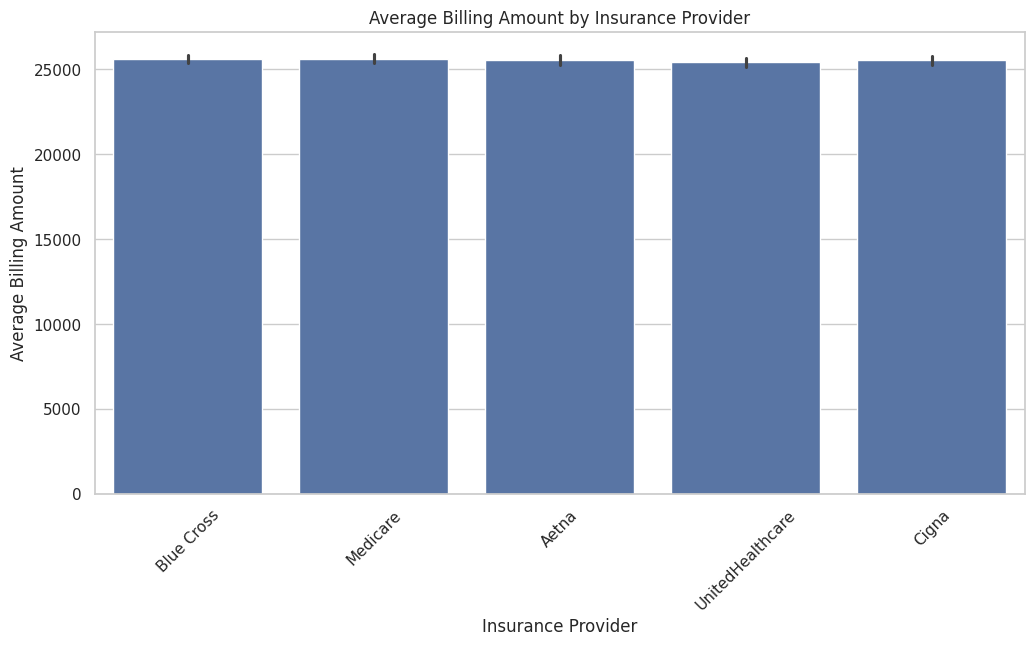

In [18]:
#bar plot for average billing by insurance provider
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Insurance Provider', y='Billing Amount', estimator='mean')
plt.title("Average Billing Amount by Insurance Provider")
plt.xlabel("Insurance Provider")
plt.ylabel("Average Billing Amount")
plt.xticks(rotation=45)
plt.show()

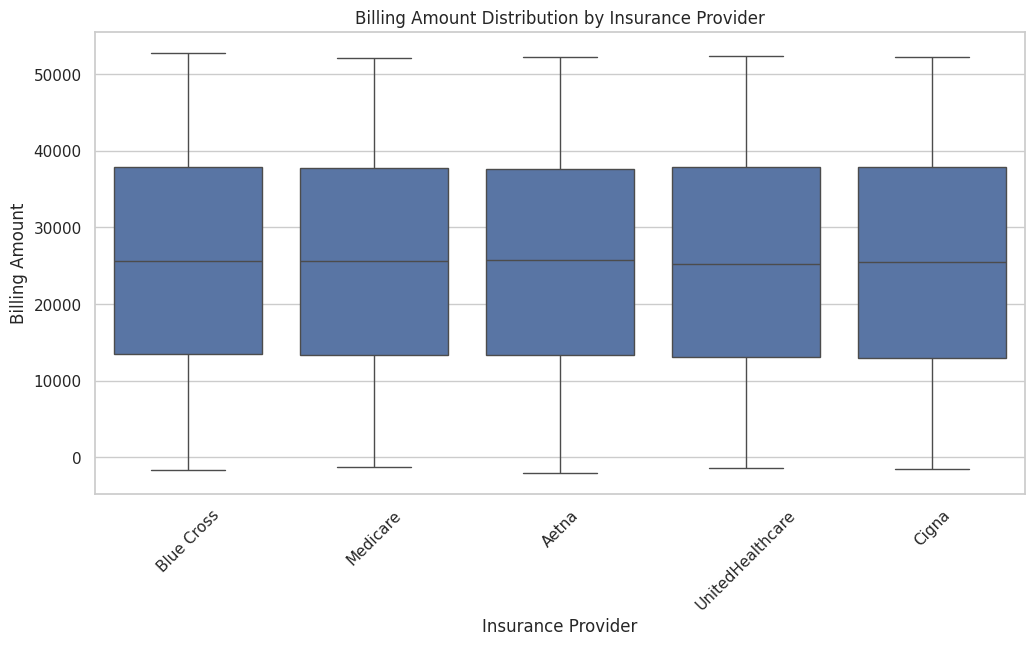

In [19]:
# Box plot for distribution of billing amounts by insurance provider
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Insurance Provider', y='Billing Amount')
plt.title("Billing Amount Distribution by Insurance Provider")
plt.xlabel("Insurance Provider")
plt.ylabel("Billing Amount")
plt.xticks(rotation=45)
plt.show()

Comparing Providers

Calculate the average and median billing amounts for each provider and use a violin plot for a more detailed distribution view.

In [20]:
# Calculate average and median billing by provider
billing_summary = df.groupby('Insurance Provider')['Billing Amount'].agg(['mean', 'median']).reset_index()
print(billing_summary)

  Insurance Provider          mean        median
0              Aetna  25549.689648  25765.376030
1         Blue Cross  25603.460603  25580.538127
2              Cigna  25525.998670  25537.181217
3           Medicare  25628.320208  25629.326758
4   UnitedHealthcare  25414.506208  25222.108878


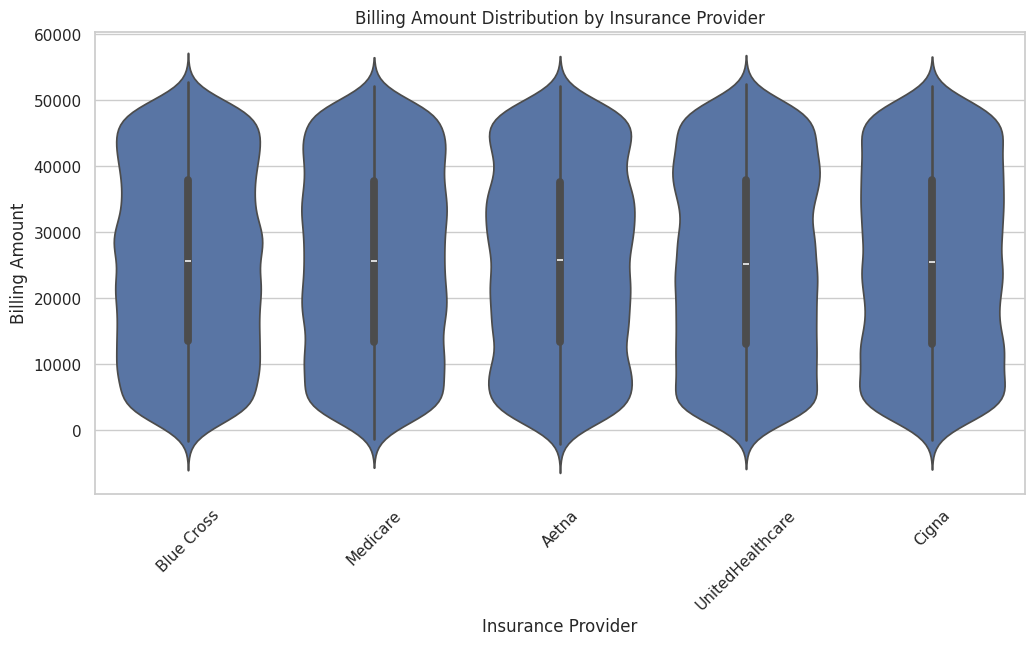

In [21]:
# Violin plot for distribution of billing amounts by insurance provider
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Insurance Provider', y='Billing Amount')
plt.title("Billing Amount Distribution by Insurance Provider")
plt.xlabel("Insurance Provider")
plt.ylabel("Billing Amount")
plt.xticks(rotation=45)
plt.show()

Billing By Medical Conditions

Visualize how billing amounts differ by Medical Condition using a bar chart for averages and a violin plot to compare distributions.

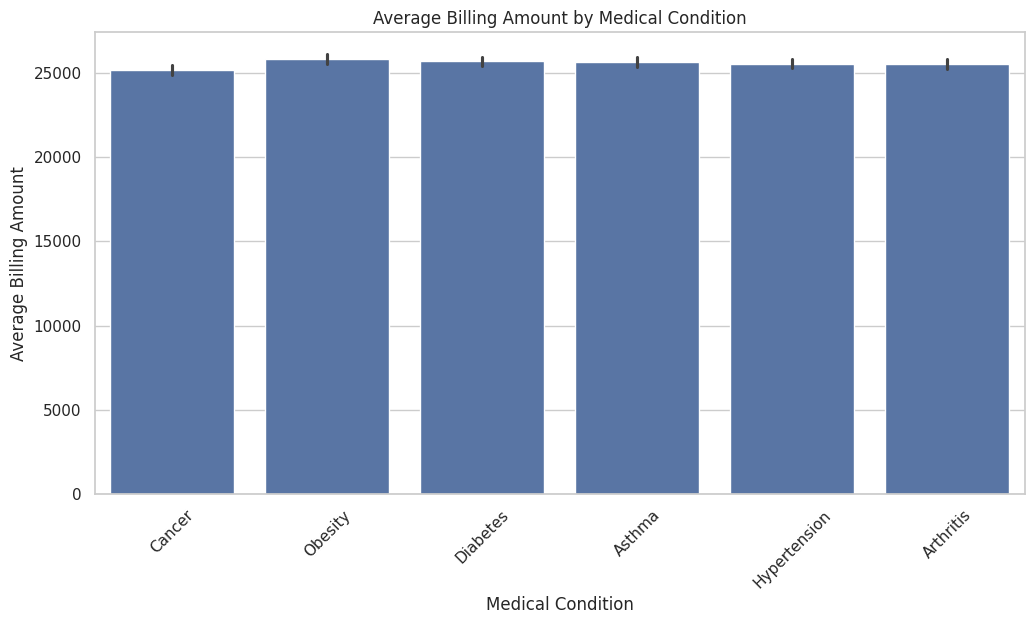

In [22]:
# Bar plot for average billing by medical condition
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Medical Condition', y='Billing Amount', estimator='mean')
plt.title("Average Billing Amount by Medical Condition")
plt.xlabel("Medical Condition")
plt.ylabel("Average Billing Amount")
plt.xticks(rotation=45)
plt.show()

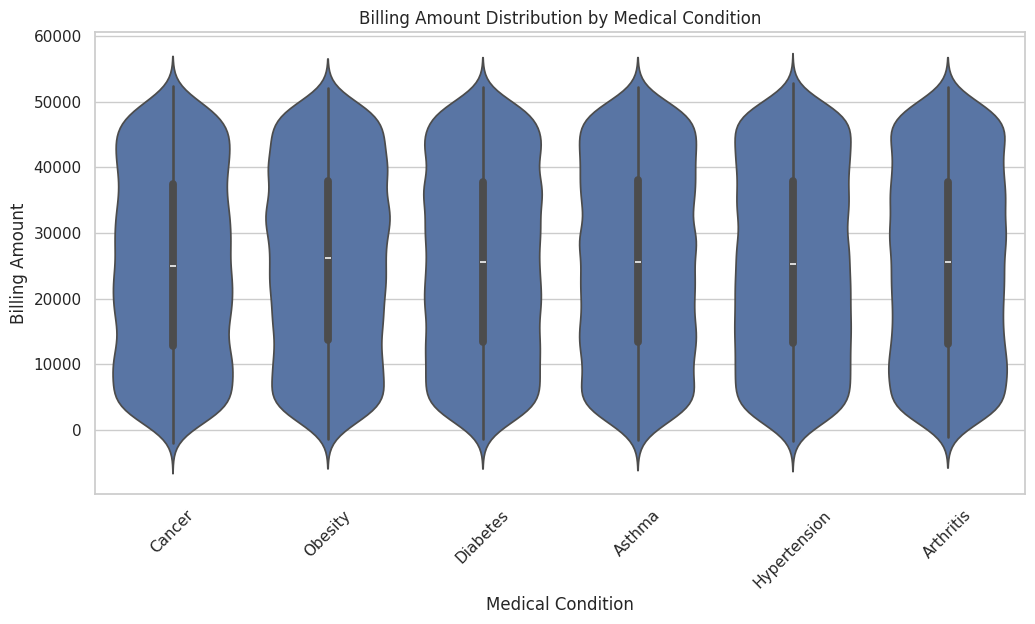

In [23]:
# Violin plot for billing distribution by medical condition
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Medical Condition', y='Billing Amount')
plt.title("Billing Amount Distribution by Medical Condition")
plt.xlabel("Medical Condition")
plt.ylabel("Billing Amount")
plt.xticks(rotation=45)
plt.show()

 Insurance Provider vs. Medical Condition (Heatmap)

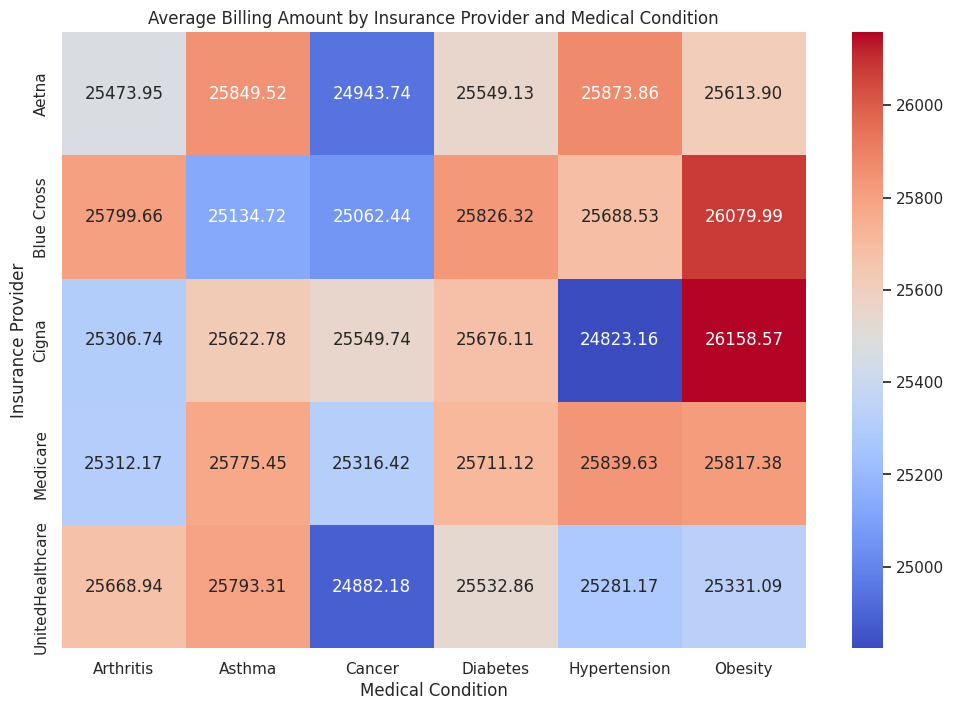

In [24]:
# Calculate average billing amount for each provider and condition combination
pivot_table = df.pivot_table(values='Billing Amount', index='Insurance Provider', columns='Medical Condition', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Average Billing Amount by Insurance Provider and Medical Condition")
plt.xlabel("Medical Condition")
plt.ylabel("Insurance Provider")
plt.show()

Billing By Admission Type

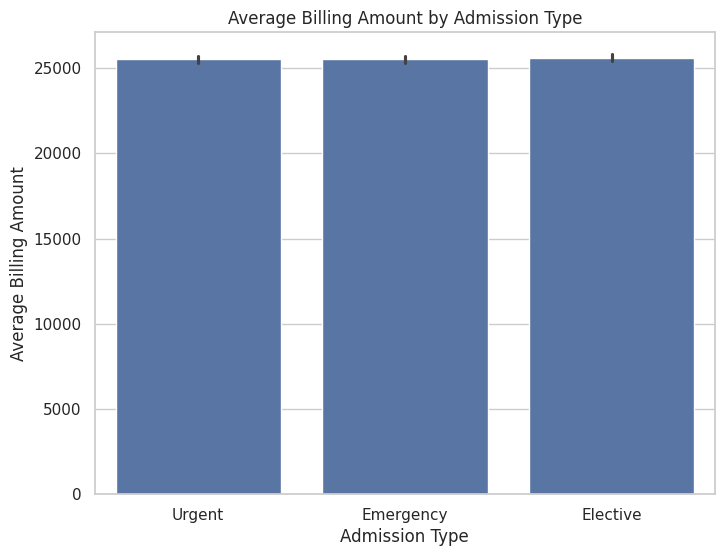

In [25]:
# Bar plot for average billing by admission type
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Admission Type', y='Billing Amount', estimator='mean')
plt.title("Average Billing Amount by Admission Type")
plt.xlabel("Admission Type")
plt.ylabel("Average Billing Amount")
plt.show()

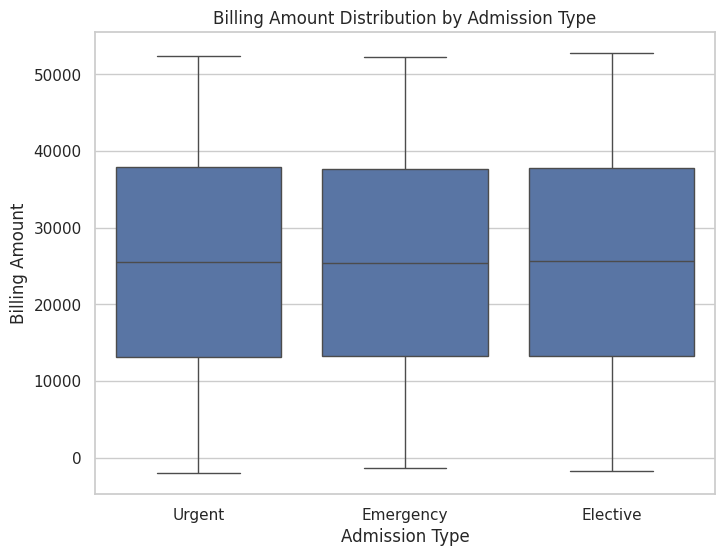

In [26]:
# Box plot for billing distribution by admission type
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Admission Type', y='Billing Amount')
plt.title("Billing Amount Distribution by Admission Type")
plt.xlabel("Admission Type")
plt.ylabel("Billing Amount")
plt.show()

Intersection of Provider and Admission Type - Analyze how billing amounts vary by Insurance Provider within each Admission Type.

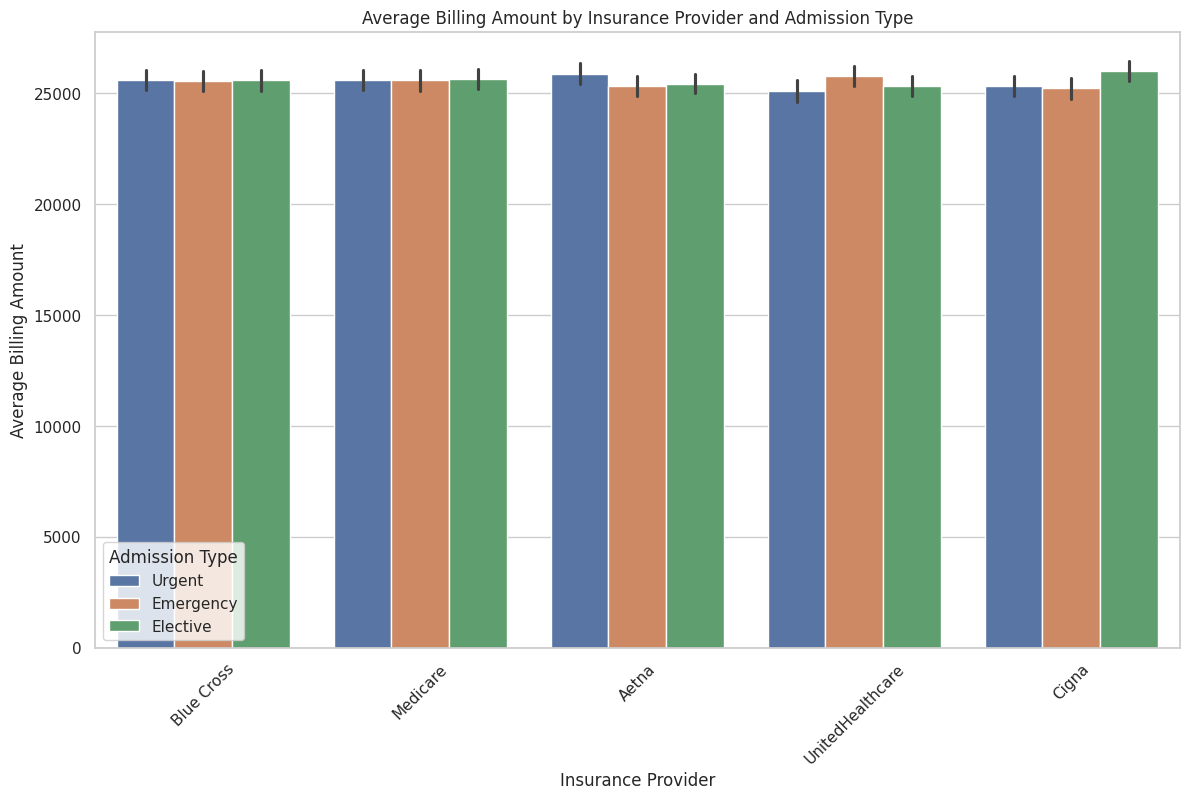

In [27]:
# Grouped bar plot of average billing by insurance provider and admission type
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='Insurance Provider', y='Billing Amount', hue='Admission Type', estimator='mean')
plt.title("Average Billing Amount by Insurance Provider and Admission Type")
plt.xlabel("Insurance Provider")
plt.ylabel("Average Billing Amount")
plt.xticks(rotation=45)
plt.legend(title="Admission Type")
plt.show()


In [28]:
# Convert Blood Type to categorical
# df['Blood Type'] = df['Blood Type'].astype('category')

# Convert binary categorical variable using label encoding
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# One-hot encode multi-class categorical variables
df = pd.get_dummies(df, columns=['Blood Type','Insurance Provider', 'Medical Condition', 'Medication', 'Admission Type', 'Test Results'], drop_first=True)


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Name                                 54966 non-null  object        
 1   Age                                  54966 non-null  int64         
 2   Gender                               54966 non-null  int64         
 3   Date of Admission                    54966 non-null  datetime64[ns]
 4   Doctor                               54966 non-null  object        
 5   Hospital                             54966 non-null  object        
 6   Billing Amount                       54966 non-null  float64       
 7   Room Number                          54966 non-null  int64         
 8   Discharge Date                       54966 non-null  datetime64[ns]
 9   Length of Stay (days)                54966 non-null  int64         
 10  Blood Type_A-  

#### **Machine Learning Modeling**

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [31]:
# Define target variable and features
X = df.drop(columns=['Billing Amount', 'Name', 'Doctor', 'Hospital', 'Date of Admission', 'Discharge Date'])
y = df['Billing Amount']

In [32]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [42]:
# Initialize models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(n_estimators=100)
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100)
xgboost_model = xgb.XGBRegressor(n_estimators=100)

In [34]:
# Fit and predict using Linear Regression
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [35]:
# Fit and predict using Random Forest
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

In [36]:
# Fit and predict using Gradient Boosting
gradient_boosting_model.fit(X_train, y_train)
y_pred_gb = gradient_boosting_model.predict(X_test)

In [43]:
# Fit and predict using xgboost
xgboost_model.fit(X_train, y_train)
xgboost_y_pred = xgboost_model.predict(X_test)

In [37]:
# Evaluation function
def evaluate_model(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

In [38]:
# Evaluate Linear Regression
evaluate_model(y_test, y_pred_linear, "Linear Regression")

Linear Regression - MAE: 12270.22, RMSE: 14190.14


In [39]:
# Evaluate Random Forest Regressor
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

Random Forest Regressor - MAE: 11610.45, RMSE: 13710.82


In [40]:
# Evaluate Gradient Boosting Regressor
evaluate_model(y_test, y_pred_gb, "Gradient Boosting Regressor")

Gradient Boosting Regressor - MAE: 12264.56, RMSE: 14192.00


In [45]:
# Evaluate XGBoost
evaluate_model(y_test, xgboost_y_pred, "XGBoost Regressor")

XGBoost Regressor - MAE: 12303.11, RMSE: 14378.81


Among the models, the Random Forest Regressor performed the best in terms of both MAE and RMSE.

#### **Conclusion**

The analysis indicates that billing amounts across different insurance providers do not exhibit significant variability, suggesting a standardized billing process. The modeling effort has provided insights into the predictability of billing amounts based on various features, with Random Forest emerging as the most accurate model.